In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np

In [4]:
import ipyplot

def plot_recipes(recipe_list) :
    images=[]
    labels=[]
    for recipe_ID in recipe_list :
        images.append("Images/{}.jpg".format(recipe_ID))
        labels.append(recipes[recipes["Recipe_ID"]==recipe_ID]["Recipe_name"].iloc[0]+" "+str(recipes[recipes["Recipe_ID"]==recipe_ID]["Rating"].iloc[0]))
        #labels.append(recipes.iloc[recipe_ID]["Recipe_name"])
          
    images=np.array(images)
    labels=np.array(labels)
    
    ipyplot.plot_images(images, labels=labels,max_images=100, img_width=150);
    
    return(images,labels)

In [22]:
#load reviews
reviews=pd.read_csv("reviews_clean.csv")
reviews=reviews.dropna()

#load recipes
recipes=pd.read_csv("recipes_clean.csv")

#Convert ingredient and ingredient strings into ingredient lists
recipes["Ingredients_clean"]=recipes["Ingredients_clean"].apply(eval)
recipes["Ingredients_clean"]=recipes["Ingredients_clean"].apply(lambda x : list(set(x)))
recipes["Instructions"]=recipes["Instructions"].apply(lambda x : simple_preprocess(" ".join(eval(x))))

In [52]:
popular=reviews.groupby("Recipe_ID").size().sort_values(ascending=False)[:4000].index

In [65]:
mask=reviews.groupby("Recipe_ID").size()[reviews.groupby("Recipe_ID").size()>5].index
unpopular=reviews[reviews["Recipe_ID"].isin(mask)].groupby("Recipe_ID")["Rating"].mean().sort_values()[:4000].index

In [73]:
plot_recipes(unpopular[:1000]);

In [27]:
plot_recipes(tasty[:100]);

In [71]:
plot_recipes(popular[:100]);

In [74]:
def image_colorfulness(image):
    # split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))
    # compute rg = R - G
    rg = np.absolute(R - G)
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [78]:
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

In [100]:
import cv2 

popular_colorfullness=[]

for recipe_ID in popular[:1000] :
    image= cv2.imread("Images/{}.jpg".format(recipe_ID))
    image = imutils.resize(image, width=250)
    C = image_colorfulness(image)
    popular_colorfullness.append(C)

In [101]:
popular_colorfullness=np.array(popular_colorfullness)
popular_colorfullness.mean()

58.7320020866202

In [102]:
unpopular_colorfullness=[]

for recipe_ID in unpopular[:1000] :
    image= cv2.imread("Images/{}.jpg".format(recipe_ID))
    image = imutils.resize(image, width=250)
    C = image_colorfulness(image)
    unpopular_colorfullness.append(C)

In [103]:
unpopular_colorfullness=np.array(unpopular_colorfullness)
unpopular_colorfullness.mean()

54.29244862190276

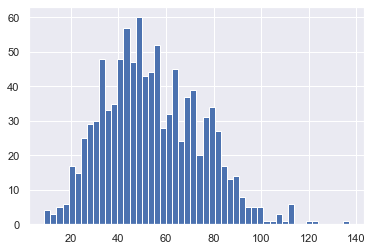

In [106]:
plt.hist(unpopular_colorfullness,bins=50);

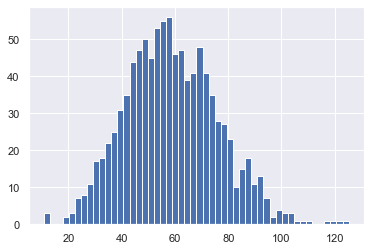

In [108]:
plt.hist(popular_colorfullness,bins=50);

In [120]:
from PIL import Image
from PIL import ImageStat
import math

popular_colorfullness=[]

for recipe_ID in popular[:1000] :
    im = Image.open("Images/{}.jpg".format(recipe_ID)) 
    stat = ImageStat.Stat(im) 
    r,g,b = stat.mean
    popular_colorfullness.append(math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)))
    

In [121]:
popular_colorfullness=np.array(popular_colorfullness)
popular_colorfullness.mean()

129.4189299566421

In [122]:
from PIL import Image
from PIL import ImageStat
import math

unpopular_colorfullness=[]

for recipe_ID in unpopular[:1000] :
    im = Image.open("Images/{}.jpg".format(recipe_ID)) 
    stat = ImageStat.Stat(im) 
    r,g,b = stat.mean
    unpopular_colorfullness.append(math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)))
    

In [123]:
unpopular_colorfullness=np.array(unpopular_colorfullness)
unpopular_colorfullness.mean()

127.76151418698952

In [231]:
if os.path.exists("Tasty_or_Not/Tasty"):
    shutil.rmtree("Tasty_or_Not/Tasty")
os.makedirs("Tasty_or_Not/Tasty")

if os.path.exists("Tasty_or_Not/Not_Tasty"):
    shutil.rmtree("Tasty_or_Not/Not_Tasty")
os.makedirs("Tasty_or_Not/Not_Tasty")


In [129]:
import shutil, os

tasty_images=[]
for recipe_ID in tasty:
    tasty_images.append("Images/{}.jpg".format(recipe_ID))
    
for f in tasty_images:
    shutil.copy(f, 'Tasty_or_Not/Tasty') 

In [233]:
import shutil, os


not_tasty_images=[]
for recipe_ID in not_tasty:
    not_tasty_images.append("Images/{}.jpg".format(recipe_ID))
    
for f in not_tasty_images:
    shutil.copy(f, 'Tasty_or_Not/Not_Tasty') 

In [234]:
#Get images width and height
import PIL
image = PIL.Image.open("Images/6663.jpg")
img_width, img_height = image.size

In [235]:
img_width

250

In [236]:
import pathlib
data_dir = pathlib.Path("Tasty_or_Not")